<a href="https://colab.research.google.com/github/nirezuluet/ML-from-scratch-/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np

In [18]:
class LinearRegression:

  def __init__(self, n_iterations = 100, lr = 0.001):
    self.lr = lr
    self.n_iterations = n_iterations
    self.weights = None
    self.bias = None

  def fit(self, X_train, y_train):

    #initialize weights and biases with zeros
    n_samples, n_features = X_train.shape
    self.weights = np.zeros(n_features)
    self.bias = 0


    #updating the first y_pred
    y_pred = np.dot(X_train, self.weights) + self.bias # this has dimension (n_samples,)

    #coding stochastic gradient descent (using the whole training set at each iteration)
    for _ in range(self.n_iterations):

      #difference between y_pred and y_train
      diff_y = y_pred - y_train # this has dimension (n_samples, )

      #gradient with respect to weights
      d_weights = (1/n_samples) * np.dot(X_train.T, diff_y) #this should have dimension (n_features, )

      #gradient with respect to bias
      d_bias = (1/n_samples) * np.sum(diff_y) #this should be a number

      #updating weights and bias
      self.weights = self.weights - self.lr * d_weights
      self.bias = self.bias - self.lr * d_bias

  def predict(self, X):
    y_predict = np.dot(X, self.weights) + self.bias
    return y_predict



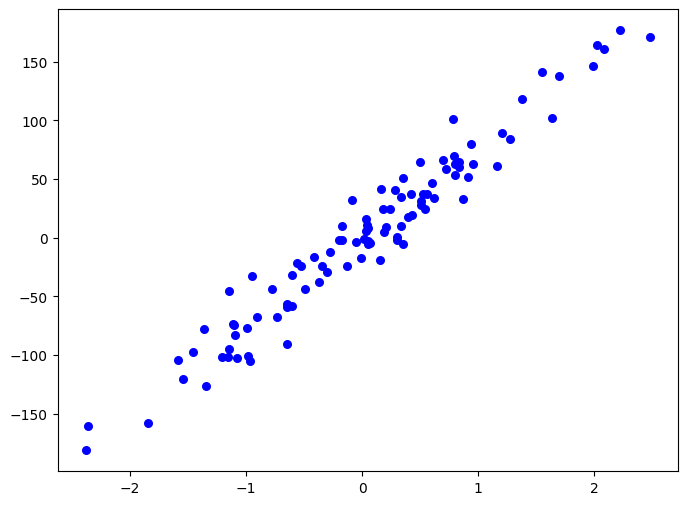

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


X,y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color = "b", marker="o", s = 30)
plt.show()

In [30]:
reg = LinearRegression(100, lr=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

def mse(y_pred, y):
  return np.mean((y_pred - y)**2)

mse(predictions, y_test)

np.float64(313.4456316942939)

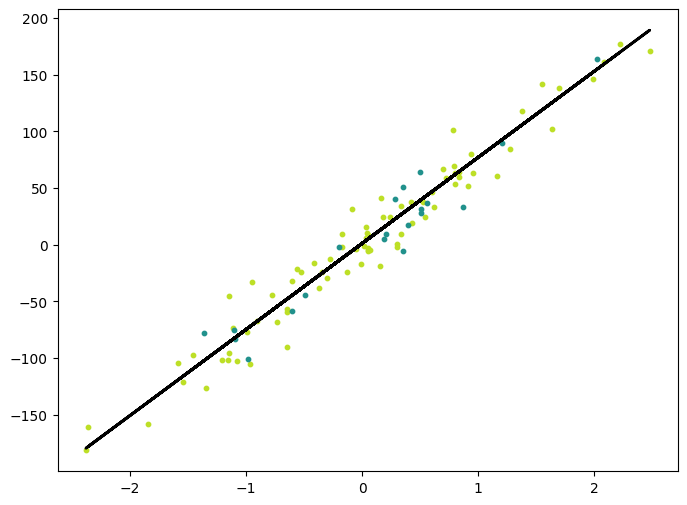

In [31]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="prediction")
plt.show()